In [1]:
from scipy import *
from scipy import sparse
from pylab import *
from matplotlib.pyplot import *
import numpy as np
import os

## 1. How PCA works

### 1.1. Generate random 2D data, carry out SVD, rotate and project.

In [143]:
x1 = np.random.rand(15) * 2 - 3
x1L = x1.tolist()
x1L.sort()
x2 = np.random.rand(15) * 2 - 1
x2L = x2.tolist()
x2L.sort()
x3 = np.random.rand(15) * 2 + 1
x3L = x3.tolist()
x3L.sort()

xL = x1L + x2L + x3L
yL = [item + np.random.normal(0,1) for item in xL]
X = np.asarray([[x, y] for x, y in zip(xL, yL)])

U, S, V = svd(X)

Xrot = np.dot(X, V.T)

XrotRed = np.copy(Xrot)
XrotRed[:,1] = 0

Xhat = np.dot(XrotRed, V)

XrotL = [item[0] for item in Xrot]
YrotL = [item[1] for item in Xrot]

XrotRedL = [item[0] for item in XrotRed]
YrotRedL = [item[1] for item in XrotRed]

XhatL = [item[0] for item in Xhat]
YhatL = [item[1] for item in Xhat]

### 1.2. Plotting

<span style="color:blue">Here, it should be noticed that the output 'V' (as the third output of SVD) we specify below in the codes is in fact the transpose of 'V'! Also, here we have the input matrix 'X' has 2 columns and the first 2 columns in the output matrix 'U' is the actual 'U' in SVD!</span>

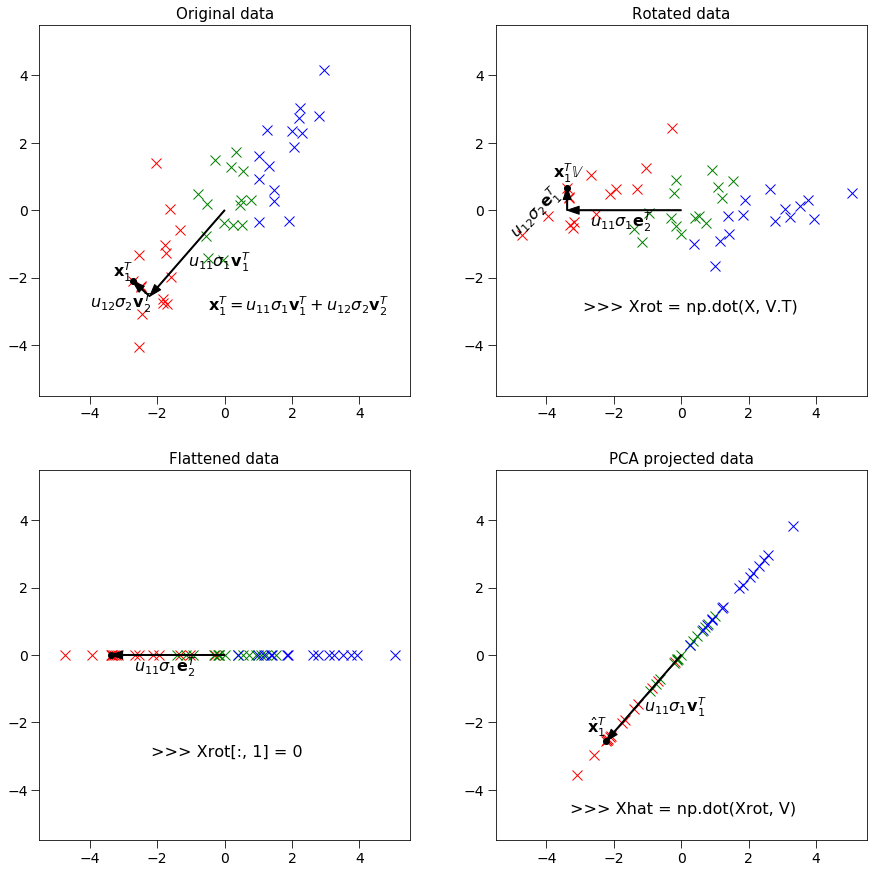

In [155]:
fig, ax = subplots(2, 2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[0][0].plot(xL[0:15], yL[0:15], 'rx', markersize=10)
ax[0][0].plot(xL[15:30], yL[15:30], 'gx', markersize=10)
ax[0][0].plot(xL[30:45], yL[30:45], 'bx', markersize=10)
ax[0][0].set_title('Original data', {'fontsize': 15,
                                     'verticalalignment': 'baseline',
                                     'horizontalalignment': 'center'})
ax[0][0].text(-1.1, -1.7, r'$u_{11}\sigma_1\mathbf{v}_1^T$', fontsize=16)
ax[0][0].text(-4.0, -2.9, r'$u_{12}\sigma_2\mathbf{v}_2^T$', fontsize=16)
ax[0][0].plot(xL[0], yL[0], 'ko')
ax[0][0].text(-3.3, -2.0, r'$\mathbf{x}_1^T$', fontsize=16)
ax[0][0].annotate('',
            xy=(U[0][0] * S[0] * V[0][0], U[0][0] * S[0] * V[0][1]),
            xytext=(0, 0),
            arrowprops={'headlength': 12, 'headwidth': 8, 'width': 1, 'ec': 'k', 'fc': 'k'},
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][0].annotate('',
            xy=(U[0][1] * S[1] * V[1][0] + U[0][0] * S[0] * V[0][0],
                U[0][1] * S[1] * V[1][1] + U[0][0] * S[0] * V[0][1]),
            xytext=(U[0][0] * S[0] * V[0][0], U[0][0] * S[0] * V[0][1]),
            arrowprops={'headlength': 12, 'headwidth': 8, 'width': 1, 'ec': 'k', 'fc': 'k'},
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][0].text(-0.5, -3.0, r'$\mathbf{x}_1^T = u_{11}\sigma_1\mathbf{v}_1^T + u_{12}\sigma_2\mathbf{v}_2^T$', fontsize=16)

ax[0][1].plot(XrotL[0:15], YrotL[0:15], 'rx', markersize=10)
ax[0][1].plot(XrotL[15:30], YrotL[15:30], 'gx', markersize=10)
ax[0][1].plot(XrotL[30:45], YrotL[30:45], 'bx', markersize=10)
ax[0][1].set_title('Rotated data', {'fontsize': 15,
                                     'verticalalignment': 'baseline',
                                     'horizontalalignment': 'center'})

ax[0][1].annotate('',
            xy=(U[0][0] * S[0], 0),
            xytext=(0, 0),
            arrowprops={'headlength': 12, 'headwidth': 8, 'width': 1, 'ec': 'k', 'fc': 'k'},
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][1].annotate('',
            xy=(U[0][0] * S[0],
                U[0][1] * S[1]),
            xytext=(U[0][0] * S[0], 0),
            arrowprops={'headlength': 12, 'headwidth': 8, 'width': 1, 'ec': 'k', 'fc': 'k'},
            horizontalalignment='left',
            verticalalignment='bottom')

ax[0][1].plot(U[0][0] * S[0], U[0][1] * S[1], 'ko')
ax[0][1].text(-3.8, 0.95, r'$\mathbf{x}_1^T\mathbb{V}$', fontsize=16)
ax[0][1].text(-5.2, -0.8, r'$u_{12}\sigma_2\mathbf{e}_1^T$', fontsize=16, rotation=45)
ax[0][1].text(-2.7, -0.5, r'$u_{11}\sigma_1\mathbf{e}_2^T$', fontsize=16)

ax[0][1].text(-2.9, -3.0, '>>> Xrot = np.dot(X, V.T)', fontsize=16)

ax[1][0].plot(XrotRedL[0:15], YrotRedL[0:15], 'rx', markersize=10)
ax[1][0].plot(XrotRedL[15:30], YrotRedL[15:30], 'gx', markersize=10)
ax[1][0].plot(XrotRedL[30:45], YrotRedL[30:45], 'bx', markersize=10)
ax[1][0].set_title('Flattened data', {'fontsize': 15,
                                     'verticalalignment': 'baseline',
                                     'horizontalalignment': 'center'})

ax[1][0].annotate('',
            xy=(U[0][0] * S[0], 0),
            xytext=(0, 0),
            arrowprops={'headlength': 12, 'headwidth': 8, 'width': 1, 'ec': 'k', 'fc': 'k'},
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][0].plot(U[0][0] * S[0], 0, 'ko')
ax[1][0].text(-2.7, -0.5, r'$u_{11}\sigma_1\mathbf{e}_2^T$', fontsize=16)
ax[1][0].text(-2.2, -3.0, r'>>> Xrot[:, 1] = 0', fontsize=16)

ax[1][1].plot(XhatL[0:15], YhatL[0:15], 'rx', markersize=10)
ax[1][1].plot(XhatL[15:30], YhatL[15:30], 'gx', markersize=10)
ax[1][1].plot(XhatL[30:45], YhatL[30:45], 'bx', markersize=10)
ax[1][1].set_title('PCA projected data', {'fontsize': 15,
                                     'verticalalignment': 'baseline',
                                     'horizontalalignment': 'center'})

ax[1][1].annotate('',
            xy=(U[0][0] * S[0] * V[0][0], U[0][0] * S[0] * V[0][1]),
            xytext=(0, 0),
            arrowprops={'headlength': 12, 'headwidth': 8, 'width': 1, 'ec': 'k', 'fc': 'k'},
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][1].plot(U[0][0] * S[0] * V[0][0], U[0][0] * S[0] * V[0][1], 'ko')
ax[1][1].text(-1.1, -1.7, r'$u_{11}\sigma_1\mathbf{v}_1^T$', fontsize=16)
ax[1][1].text(-2.8, -2.3, r'$\hat{\mathbf{x}}_1^T$', fontsize=16)
ax[1][1].text(-3.3, -4.7, r'>>> Xhat = np.dot(Xrot, V)', fontsize=16)

for i in range(2):
    for j in range(2):
        ax[i][j].set_aspect('equal')
        ax[i][j].set_xlim(-5.5,5.5)
        ax[i][j].set_ylim(-5.5,5.5)
        ax[i][j].tick_params(axis='both', which='major', labelsize=14, length=8)

pl.savefig(os.path.join('images/', 'predictive.png'), bbox_inches='tight')

## 2. 2D visualization of images with PCA.

<Figure size 432x288 with 0 Axes>

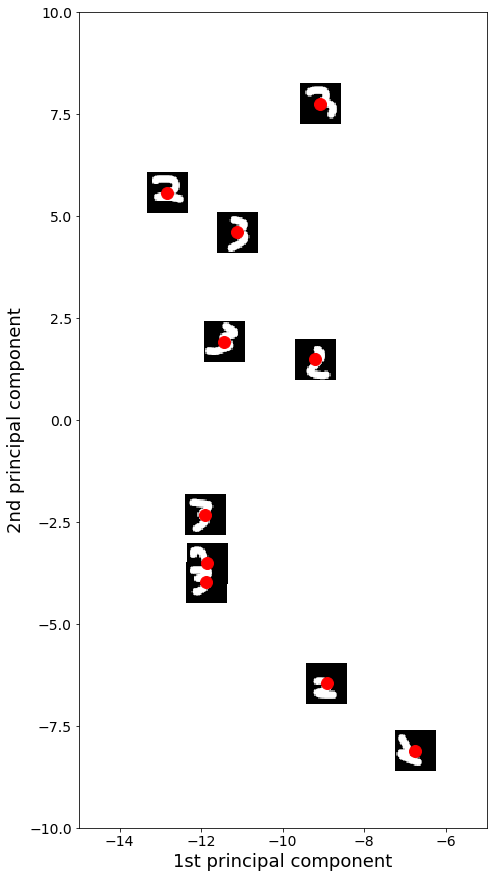

In [2]:
img_list = []

# Read in 10 images (30x30) and expand each image as a single row vector (1x900).
# Then stick all 10 row vectors together to get a final 10x900 matrix.
for i in range(10):
    img = imread(os.path.join("images/PCA_2D_Visual/", str(i + 1) + ".png"))[:,:,0]
    img_list.append(img)
    if i == 0:
        img_rs = resize(img,(1,size(img)))
    else:
        img_rs_temp = resize(img,(1,size(img)))
        img_rs = append(img_rs, img_rs_temp, axis=0)

# SVD and truncate to the 2nd order.
U, S, V = svd(img_rs)
k = 2
Z = dot(U[:,:k], eye(k) * S[:k])

gray() # show image with gray scale.
fig, ax = plt.subplots(figsize=(15, 15))
# Show all images first. Here the coordinate of each image is just the 1st and 2nd 
# component of PCA, i. e, images sit together with their 2D representation points.
for i in range(10):
    ax.imshow(img_list[i], aspect='auto', extent=(Z[i, 0] - 0.5,
                                                  Z[i, 0] + 0.5,
                                                  Z[i, 1] - 0.5,
                                                  Z[i, 1] + 0.5),
              zorder=-1)

# Plot the 2D representation points of images, which is basically the 1st and 2nd PCA components.
ax.plot(Z[:,0], Z[:,1], 'ro', markersize=12)
ax.set_xlim(-15,-5)
ax.set_ylim(-10,10)
ax.set_aspect('equal')
ax.set_xlabel("1st principal component", fontsize=18)
ax.set_ylabel("2nd principal component", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

show()